### Reading data from multiple models: the ReadMultiGrid class

The `pyaerocom.ReadMultiGrid` class provides an interface to import multiple variables for an arbitrary number of different models and within a specific time interval. It makes large use of the `ReadGrid` class that provides an interface for importing results from a single model.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from pyaerocom.io.readgrid import ReadMultiGrid

Define two models (this list can contain as many models as you like)

In [2]:
models = ["AATSR_SU_v4.3", "CAM5.3-Oslo_CTRL2016"]

Create and initiate `ReadMultiGrid` class. The direcory for each model as well as all valid files in the model directories are searched on initiation of the instance. Valid here means, that the files belong to the corresponding model. Subsetting of the time interval is done in a later process.

In [3]:
read = ReadMultiGrid(models, '2010-01-01','2011-12-31', verbose=True)

Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/
Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom1/
Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom2/
Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE
Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/
Searching dir for ID AATSR_SU_v4.3 in: /lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/
Found model dir: /lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/AATSR_SU_v4.3/renamed
Searching dir for ID CAM5.3-Oslo_CTRL2016 in: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/
Searching dir for ID CAM5.3-Oslo_CTRL2016 in: /lustre/storeA/project/aerocom/aerocom1/
Searching dir for ID CAM5.3-Oslo_CTRL2016 in: /lustre/storeA/project/aerocom/aerocom2/


Let's have a look into one of the two import classes

In [4]:
read_aatsr = read["AATSR_SU_v4.3"]
print("Model ID: %s\n"
      "Model dir: %s\n"
      "First detected file: %s"
      %(read_aatsr.name, read_aatsr.model_dir, os.path.basename(read_aatsr.files[0])))

Model ID: AATSR_SU_v4.3
Model dir: /lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/AATSR_SU_v4.3/renamed
First detected file: aerocom.AATSR_SU_v4.3.daily.od550erraer.2003.nc


Define a bunch of test variables that are supposed to be loaded for each model (i.e. that must be contained in both input models)

In [5]:
test_vars = ["od550aer", "od550dust"]

Read all variables for all models

In [6]:
result_dict = read.read(test_vars)

FOUND MATCH: aerocom.AATSR_SU_v4.3.daily.od550aer.2010.nc
FOUND MATCH: aerocom.AATSR_SU_v4.3.daily.od550aer.2011.nc
Cubes for variable od550aer have different meta data settings. These will be unified using the metadata dictionary of the first cube (otherwise the method concatenate of the iris package won't work)
Applying temporal cropping of result cube
Failed to crop data for od550aer in time.
Error: AttributeError("'GridData' object has no attribute 'get_time_constraint'",)
FOUND MATCH: aerocom.AATSR_SU_v4.3.daily.od550dust.2010.nc
FOUND MATCH: aerocom.AATSR_SU_v4.3.daily.od550dust.2011.nc
Cubes for variable od550dust have different meta data settings. These will be unified using the metadata dictionary of the first cube (otherwise the method concatenate of the iris package won't work)
Applying temporal cropping of result cube
Failed to crop data for od550dust in time.
Error: AttributeError("'GridData' object has no attribute 'get_time_constraint'",)
FOUND MATCH: aerocom3_CAM5.3-Osl

Print what is in there (similar to the previously introduced `ReadGrid` class, also the `ReadMultiGrid` class has a nice string representation)

In [7]:
print(read)

Stop time could not be accessed in GridData class
Stop time could not be accessed in GridData class
Stop time could not be accessed in GridData class
Stop time could not be accessed in GridData class

Pyaerocom ReadMultiGrid
-----------------------
Model IDs: ['AATSR_SU_v4.3', 'CAM5.3-Oslo_CTRL2016']

Loaded data:

Pyaerocom ReadGrid
------------------
Model ID: AATSR_SU_v4.3
Available variables: ['abs550aer', 'ang4487aer', 'od550aer', 'od550dust', 'od550erraer', 'od550gt1aer', 'od550lt1aer']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

Loaded GridData objects:

Pyaerocom GridData
------------------
Variable: od550aer
Temporal resolution: daily
Start / Stop: 2010-01-01T00:00:00.000000 - nan

Pyaerocom GridData
------------------
Variable: od550dust
Temporal resolution: daily
Start / Stop: 2010-01-01T00:00:00.000000 - nan

Pyaerocom ReadGrid
------------------
Model ID: CAM5.3-Oslo_CTRL2016
Available variables: ['abs550aer', 'deltaz3d', 'humidity3

Print some information about the different data objects

In [8]:
for name, result in read.results.items():
    print("Current model: %s" %name)
    for var_name, data in result.data.items():
        print("\nCurrent variable: %s" %var_name)
        # data is of type pyaerocom.GridData which uses an extended representation of the Cube class
        print(repr(data))

Current model: AATSR_SU_v4.3

Current variable: od550aer
pyaerocom.GridData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 730; latitude: 180; longitude: 360)>

Current variable: od550dust
pyaerocom.GridData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 730; latitude: 180; longitude: 360)>
Current model: CAM5.3-Oslo_CTRL2016

Current variable: od550aer
pyaerocom.GridData
Grid data: <iris 'Cube' of Aerosol optical depth at 550nm / (1) (time: 365; latitude: 192; longitude: 288)>

Current variable: od550dust
pyaerocom.GridData
Grid data: <iris 'Cube' of mineral aerosol optical depth 550nm / (1) (time: 365; latitude: 192; longitude: 288)>


Now arbitrarily crop the last data object.

In [9]:
print("\nStart / stop before crop: %s - %s\n"
      %(data.start_time,
        data.stop_time))

dat_crop = data.crop(lon_range=(-30, 30),
                     lat_range=(0, 45),
                     time_range=('2010-03-15','2010-06-22'))


print("Start / stop after crop: %s - %s"
      %(dat_crop.grid.coord("time").cell(0).point,
        dat_crop.grid.coord("time").cell(-1).point))

Stop time could not be accessed in GridData class

Start / stop before crop: 2010-01-01T00:00:00.000000 - nan

Cropping along time axis based on Timestamps
Start / stop after crop: 2010-03-15 00:00:00 - 2010-06-22 00:00:00


Plot a map of the first day.

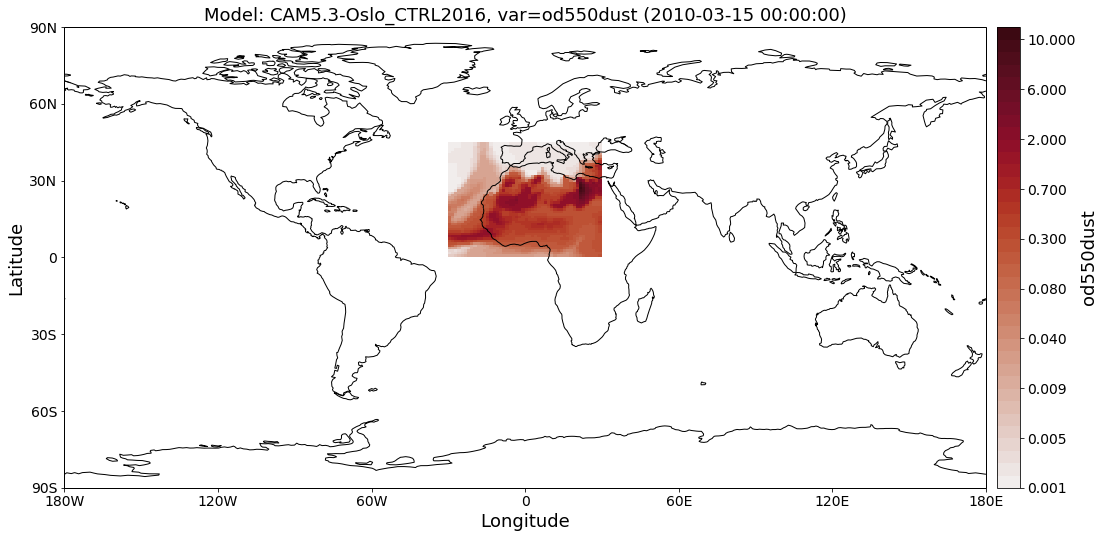

In [10]:
fig = dat_crop.quickplot_map()

#### Iterate over models and variables

The following cell iterates over all imported variables and models and plots the first time stamp of each result file.

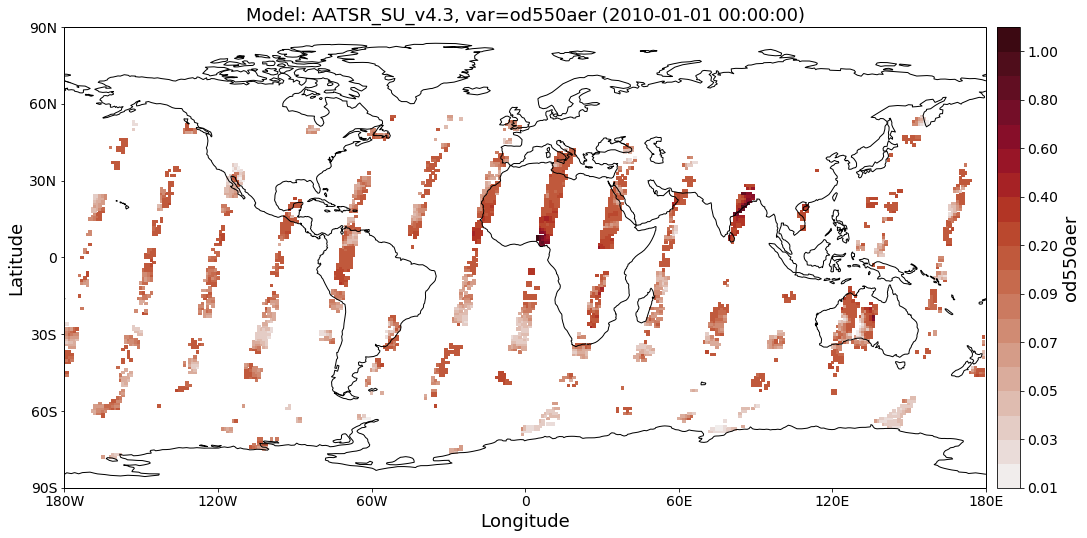

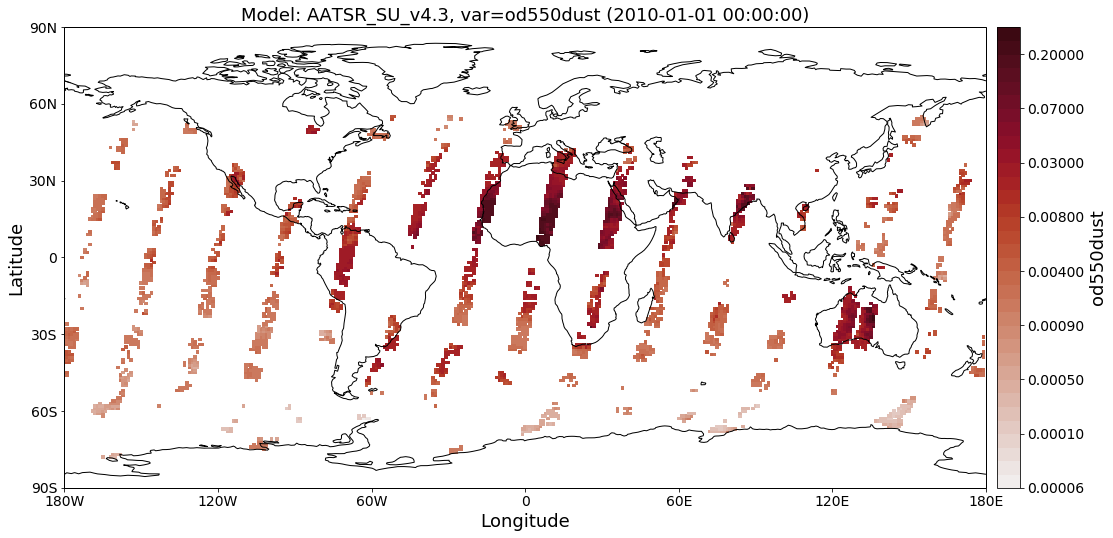

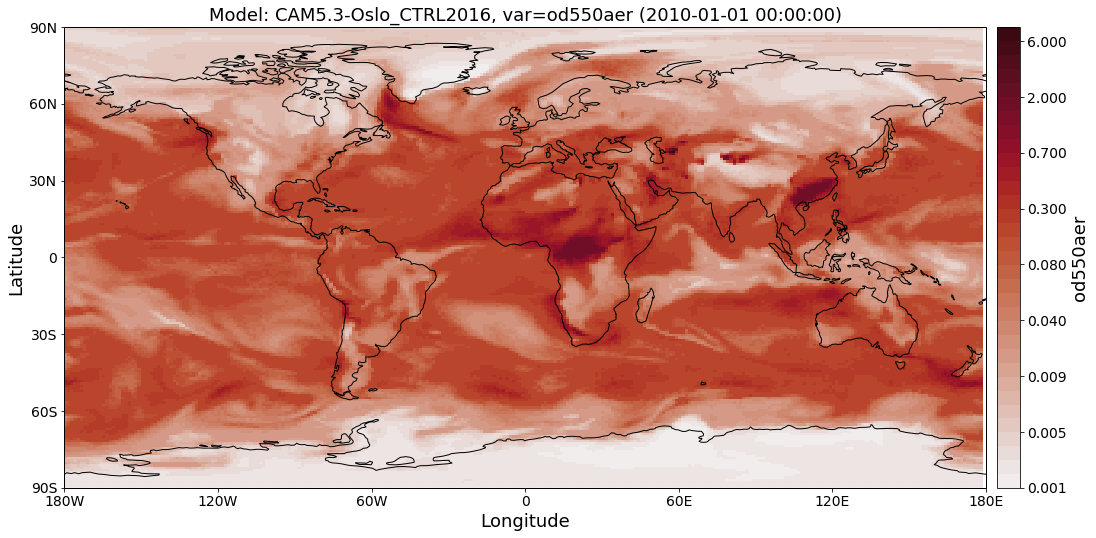

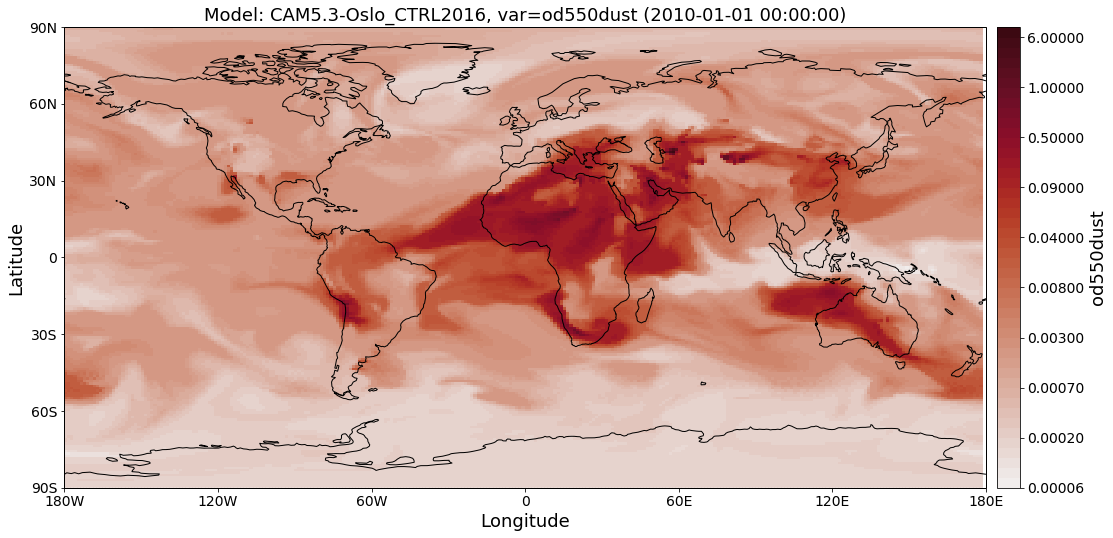

In [11]:
for name, result in read.results.items():
    for var_name, model_data in result.data.items():
        fig = model_data.quickplot_map()